Kulle Omer <p>
Phase 3 Project <p>
Self-Paced <p>

# SyriaTel Customer Churn 

We will be assisting SyriaTel in determining why customers are churning. We will use the data science process of OSEMN which is obtaining the data, scrubbing the data, exploring it, modeling it, and finally interpreting it. This will allow SyriaTel to recognize their customers who are unsatisfied in leaving and give them an opportunity to explore ways to keep them. This is a binary classisfication since we are determining if a customer stays or leaves SyriaTel.

### Obtain Data

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Modeling
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline 
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#Metrics
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, log_loss, plot_confusion_matrix
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("file:///Users/kulleomer/Downloads/bigml_59c28831336c6604c800002a.csv")

#### Data Cleaning 

In [3]:
df.info() #creating dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [4]:
df.head() #taking a look at it

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
df.isna().sum() #looking for null values

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [6]:
df['churn'] = df['churn'].astype(int) #changing churn values to 0/1
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


We see that there aren't any null values, however there are some categorical columns that we must convert to numerical down the line. Looks good overall.

#### Exploratory Data

In [7]:
df['churn'].value_counts() #looking at churn values

0    2850
1     483
Name: churn, dtype: int64

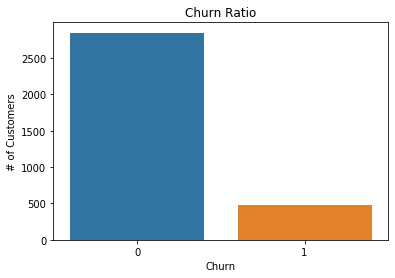

In [8]:
sns.countplot(x = 'churn', data = df)
plt.title('Churn Ratio')
plt.xlabel('Churn')
plt.ylabel('# of Customers')
plt.savefig("Ratio of Churn")

In [9]:
Percent_churn = 483/(2850+483)
print(Percent_churn) #percentage of customers churning

0.14491449144914492


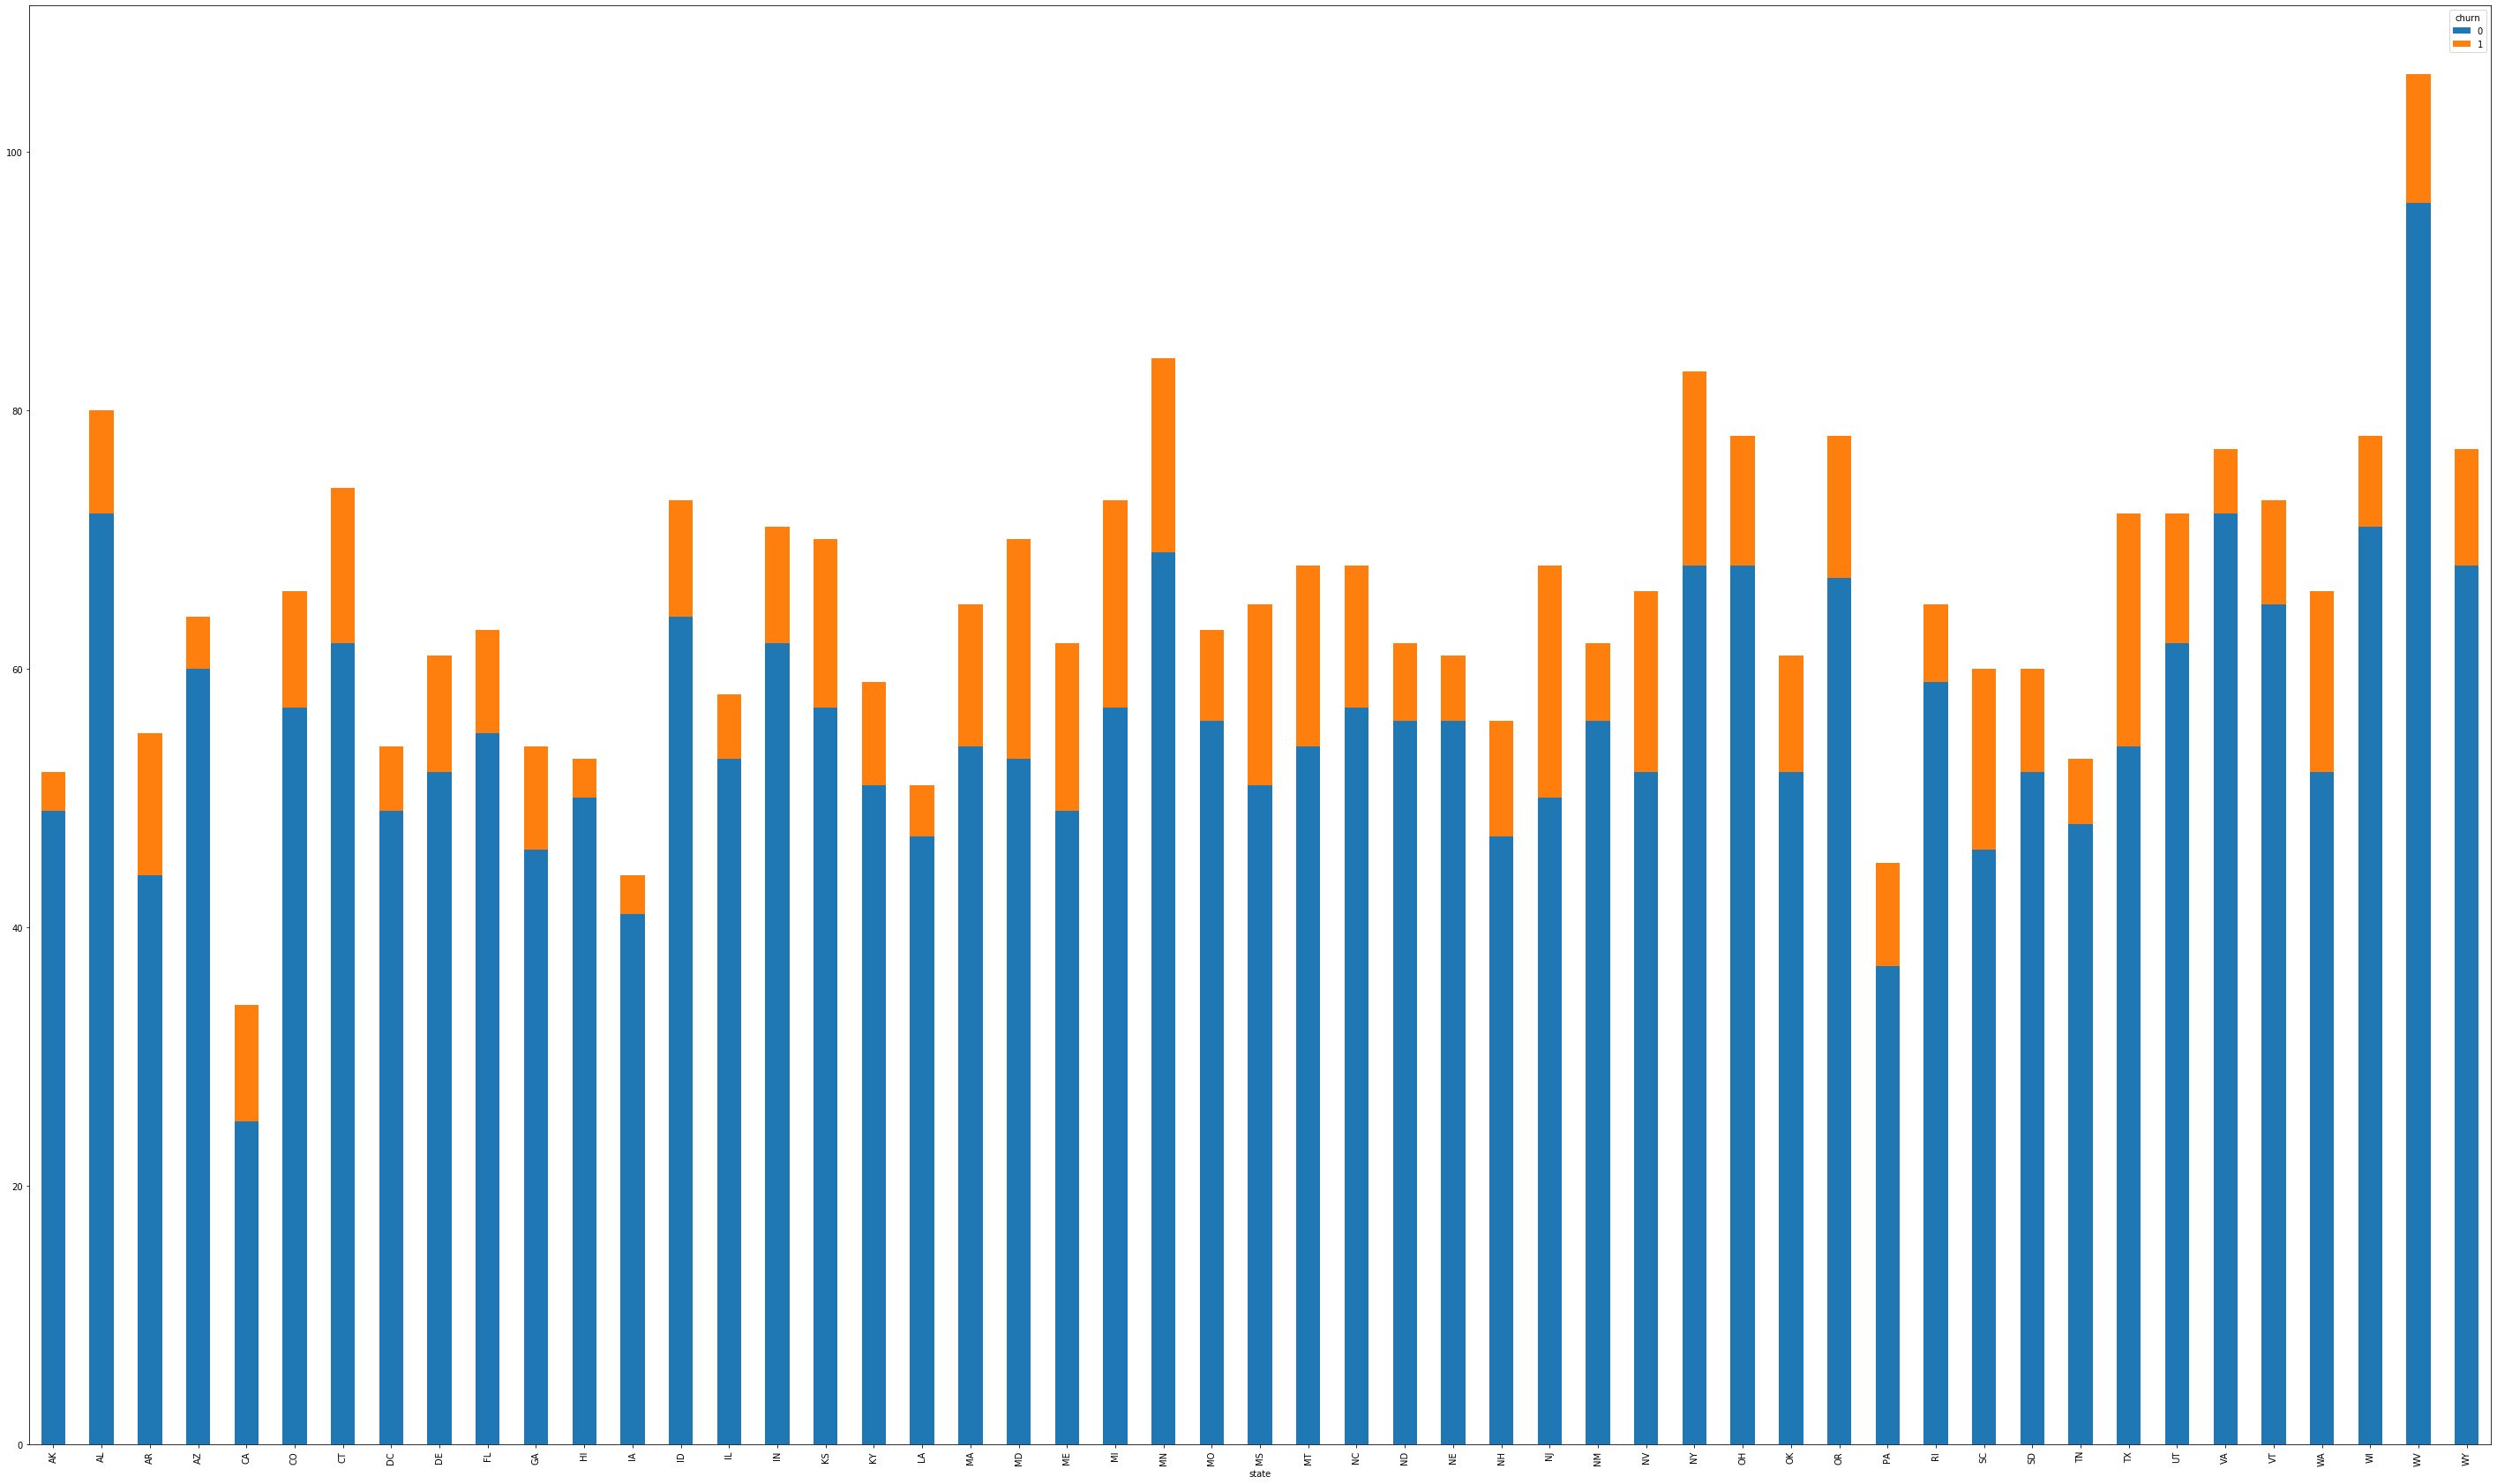

In [10]:
df.groupby(["state", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(50,30))

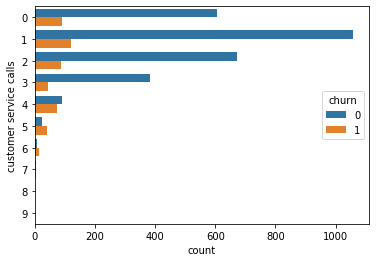

In [11]:
sns.countplot(y='customer service calls', hue='churn', data=df)

State with the minimum amount of calls:
state
CA    10431
Name: all calls, dtype: int64
State with the maximum amount of calls:
state
WV    32055
Name: all calls, dtype: int64


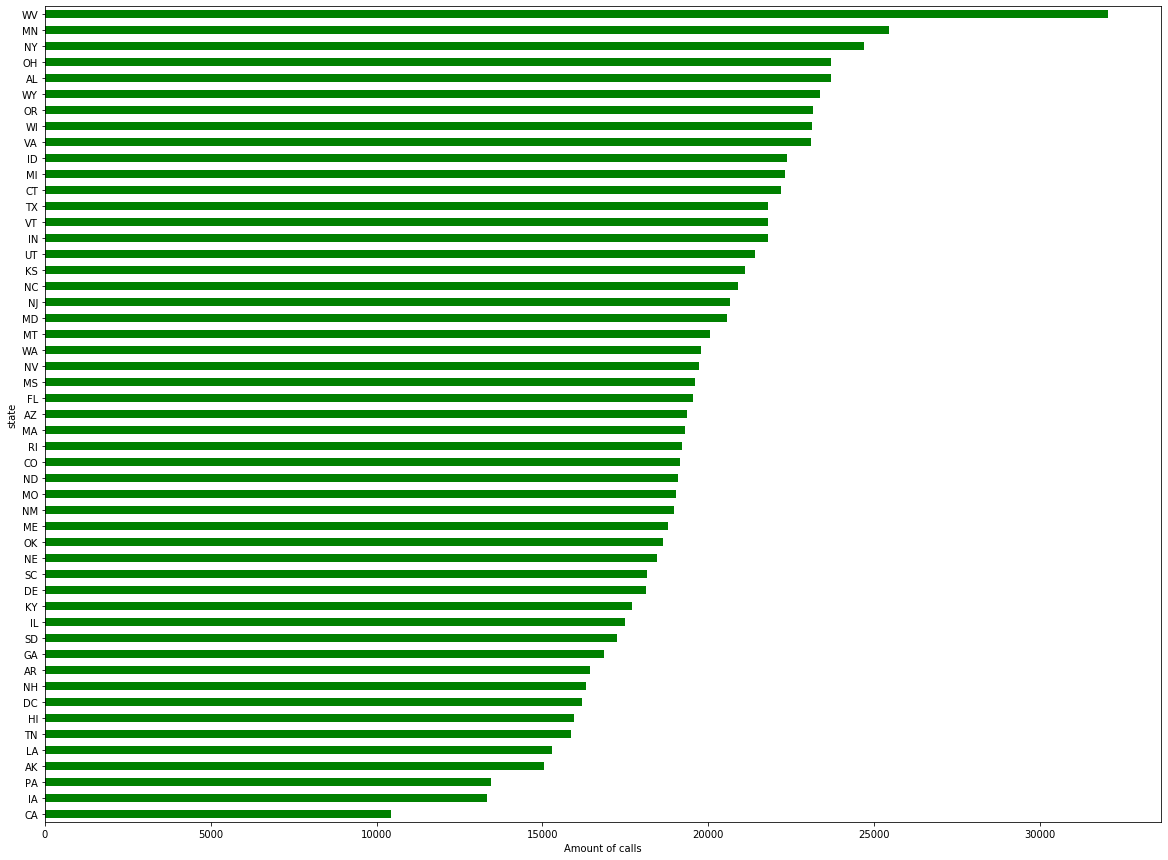

In [12]:
df['all calls'] = df['total day calls'] + df['total eve calls'] + df['total night calls']
state_calls = df.groupby('state')['all calls'].sum().sort_values()
print('State with the minimum amount of calls:\n', state_calls[state_calls == state_calls[0]], sep='')
print('State with the maximum amount of calls:\n', state_calls[state_calls == state_calls[-1]], sep='')
plt.xlabel('Amount of calls')
plt.ylabel('State')
state_calls.plot(kind='barh', x='Amount of calls', y='State', figsize=(20, 15), colormap='ocean')

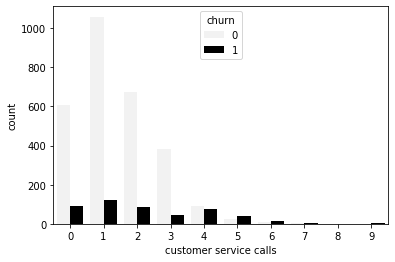

In [13]:
sns.countplot(x='customer service calls', hue='churn', data=df, color = 'black')

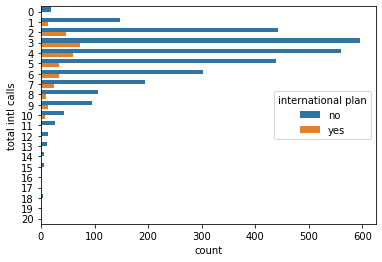

In [14]:
sns.countplot(y='total intl calls', hue='international plan', data=df)

Our exploratory data gives us a bit of insight of the data. We see that 14% of the customers are churning, and that there is a class imbalance between those churning and not churning. While modeling, SMOTE would probably be a useful tool to fix this.

#### Preparing for modeling

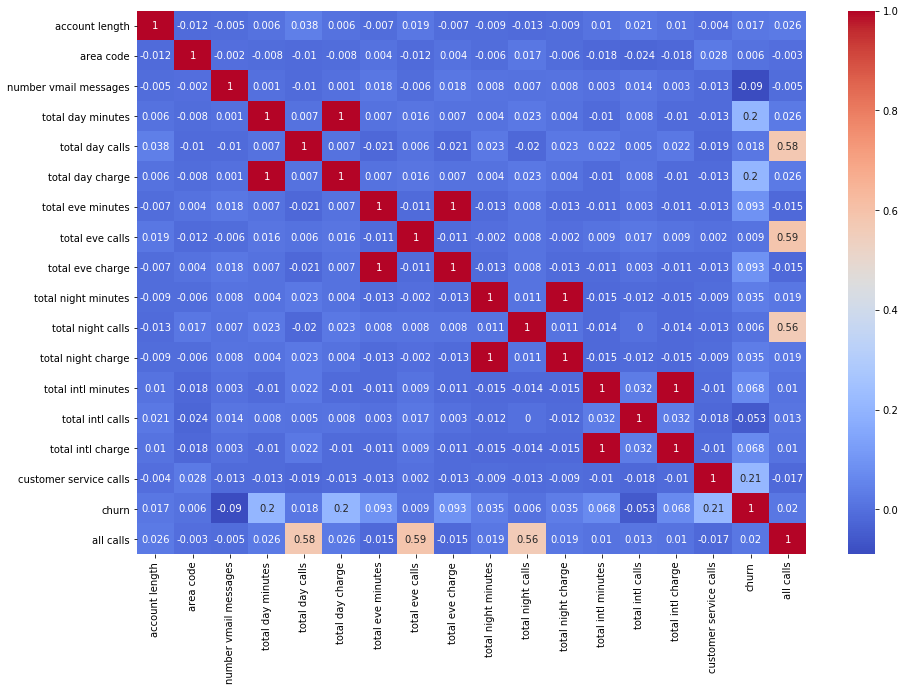

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,all calls
account length,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541,0.026157
area code,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174,-0.003119
number vmail messages,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728,-0.004925
total day minutes,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151,0.026193
total day calls,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459,0.577225
total day charge,0.006214,-0.008264,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151,0.026195
total eve minutes,-0.006757,0.003580,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796,-0.014850
total eve calls,0.019260,-0.011886,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233,0.588530
total eve charge,-0.006745,0.003607,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786,-0.014839
total night minutes,-0.008955,-0.005825,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288,0.035493,0.018582


In [15]:
cor = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(cor.round(3),annot=True,cmap='coolwarm')
plt.show()
df.corr()
#analyzing correlating values

The features that have good correlation with churn are total day charge, customer service calls, total day charge/day plan. We will find out more using machine learning methods.

In [16]:
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                       int64
all calls                   int64
dtype: object

In [17]:
corr_matrix = df.corr()
corr_matrix['churn'].sort_values(ascending=False)

churn                     1.000000
customer service calls    0.208750
total day minutes         0.205151
total day charge          0.205151
total eve minutes         0.092796
total eve charge          0.092786
total intl charge         0.068259
total intl minutes        0.068239
total night charge        0.035496
total night minutes       0.035493
all calls                 0.019651
total day calls           0.018459
account length            0.016541
total eve calls           0.009233
area code                 0.006174
total night calls         0.006141
total intl calls         -0.052844
number vmail messages    -0.089728
Name: churn, dtype: float64

Customer service calls, total day minutes, total day charge are the features most correlated with churn. Our model will give us more insight regarding this.

In [18]:
df = df.drop(['area code', 'state', 'phone number'], axis=1) 
#these features are causing noise 
#I don't think they are necessary so i will drop them

In [19]:
#making sure those values are dropped
df.head() 

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,all calls
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,300
1,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,329
2,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,328
3,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,248
4,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,356


In [20]:
#Dealing with spaces between column names
df.columns = [c.replace(' ', '_') for c in df.columns]

In [21]:
print(df["international_plan"].unique())
print(df["voice_mail_plan"].unique())
print(df["customer_service_calls"].unique())

['no' 'yes']
['yes' 'no']
[1 0 2 3 4 5 7 9 6 8]


In [22]:
#changing boolean to int
df['total_day_minutes'] = df['total_day_minutes'].astype(int)
df['total_day_charge'] = df['total_day_charge'].astype(int)
df['total_eve_minutes'] = df['total_eve_minutes'].astype(int)
df['total_eve_charge'] = df['total_eve_charge'].astype(int)
df['total_night_minutes'] = df['total_night_minutes'].astype(int)
df['total_night_charge'] = df['total_night_charge'].astype(int)
df['total_intl_minutes'] = df['total_intl_minutes'].astype(int)
df['total_intl_charge'] = df['total_intl_charge'].astype(int)


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   account_length          3333 non-null   int64 
 1   international_plan      3333 non-null   object
 2   voice_mail_plan         3333 non-null   object
 3   number_vmail_messages   3333 non-null   int64 
 4   total_day_minutes       3333 non-null   int64 
 5   total_day_calls         3333 non-null   int64 
 6   total_day_charge        3333 non-null   int64 
 7   total_eve_minutes       3333 non-null   int64 
 8   total_eve_calls         3333 non-null   int64 
 9   total_eve_charge        3333 non-null   int64 
 10  total_night_minutes     3333 non-null   int64 
 11  total_night_calls       3333 non-null   int64 
 12  total_night_charge      3333 non-null   int64 
 13  total_intl_minutes      3333 non-null   int64 
 14  total_intl_calls        3333 non-null   int64 
 15  tota

In [24]:
#encoding churn to 0/1
labelencoder = LabelEncoder()
df['churn'] = labelencoder.fit_transform(df['churn'])

In [25]:
#dropping target variable
X = df.drop(columns= 'churn', axis=1)
y = df['churn']

In [26]:
#dummying variables(subgrouping)
X
X = pd.get_dummies(X)
X.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,all_calls,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
0,128,25,265,110,45,197,99,16,244,91,11,10,3,2,1,300,1,0,0,1
1,107,26,161,123,27,195,103,16,254,103,11,13,3,3,1,329,1,0,0,1
2,137,0,243,114,41,121,110,10,162,104,7,12,5,3,0,328,1,0,1,0
3,84,0,299,71,50,61,88,5,196,89,8,6,7,1,2,248,0,1,1,0
4,75,0,166,113,28,148,122,12,186,121,8,10,3,2,3,356,0,1,1,0


In [27]:
#looking over columns
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   account_length          3333 non-null   int64
 1   number_vmail_messages   3333 non-null   int64
 2   total_day_minutes       3333 non-null   int64
 3   total_day_calls         3333 non-null   int64
 4   total_day_charge        3333 non-null   int64
 5   total_eve_minutes       3333 non-null   int64
 6   total_eve_calls         3333 non-null   int64
 7   total_eve_charge        3333 non-null   int64
 8   total_night_minutes     3333 non-null   int64
 9   total_night_calls       3333 non-null   int64
 10  total_night_charge      3333 non-null   int64
 11  total_intl_minutes      3333 non-null   int64
 12  total_intl_calls        3333 non-null   int64
 13  total_intl_charge       3333 non-null   int64
 14  customer_service_calls  3333 non-null   int64
 15  all_calls            

In [28]:
#test/train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Dummy Classifier: using this for my baseline accuracy. It would tell us that we are correct in predicting churn and no churn, and we will use it to compare the future models.

In [29]:
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train)
baseline_acc = round(dummy.score(X_test, y_test), 2) * 100
print('Baseline Accuracy: {0}%'.format(baseline_acc))

Baseline Accuracy: 85.0%


#### Model 1: Logistic Regression

In [30]:
#creating a pipeline with scaling, smote, and the lr model
lr = LogisticRegression()
LR = Pipeline([('standardscaler', StandardScaler()), ('smote', SMOTE()), ('lr', LogisticRegression())])
#fitting the model
LR.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('smote', SMOTE()),
                ('lr', LogisticRegression())])

In [31]:
#checking accuracy
LR.score(X_test, y_test)

0.7901049475262368

In [32]:
#estimating how well our unseen data is
cross_val_score(LR, X, y)

array([0.73913043, 0.77211394, 0.7856072 , 0.76876877, 0.77177177])

In [33]:
#making predictions 
LR_Pred = LR.predict(X_test)

In [34]:
print(classification_report(y_test, LR_Pred))

              precision    recall  f1-score   support

           0       0.95      0.80      0.87       566
           1       0.40      0.76      0.52       101

    accuracy                           0.79       667
   macro avg       0.67      0.78      0.69       667
weighted avg       0.87      0.79      0.81       667



Text(0.5, 1.0, 'LR Classification')

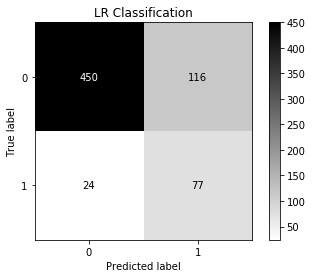

In [35]:
plot_confusion_matrix(LR, X_test, y_test, cmap='binary')
plt.title('LR Classification')

Our logistic regression model was 78% accurate in identifying the true positives(recall) which is about 76%.

#### Model 2- KNN

In [36]:
#creating knn classifier
knn = KNeighborsClassifier()

In [37]:
#creating pipeline with scaler, smote, 
KNN = Pipeline([('standardscaler', StandardScaler()), ('smote', SMOTE()), ('knn', KNeighborsClassifier())])

In [38]:
#fitting train data
KNN.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('smote', SMOTE()),
                ('knn', KNeighborsClassifier())])

In [39]:
#creating predictions
KNN_Pred = KNN.predict(X_test)

In [40]:
print(classification_report(y_test, KNN_Pred))

              precision    recall  f1-score   support

           0       0.94      0.82      0.88       566
           1       0.42      0.72      0.53       101

    accuracy                           0.81       667
   macro avg       0.68      0.77      0.71       667
weighted avg       0.86      0.81      0.83       667



Text(0.5, 1.0, 'KNN Classification')

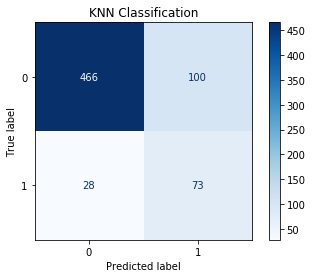

In [41]:
plot_confusion_matrix(KNN, X_test, y_test, cmap='Blues')
plt.title('KNN Classification')

The KNN model was 80% accurate in identifying the true positives (recall) of 81%.

#### Model 3- Random Forest

In [42]:
#assigning classifier
rfc = RandomForestClassifier()

In [43]:
#creating pipeline with scaler, smote, classifier
RFC = Pipeline([('standardscaler', StandardScaler()), ('smote', SMOTE()), ('rfc', RandomForestClassifier())])

In [44]:
#fitting training data
RFC.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('smote', SMOTE()),
                ('rfc', RandomForestClassifier())])

In [45]:
#viewing cross validation score
cross_val_score(RFC, X, y)

array([0.94452774, 0.94302849, 0.95052474, 0.95345345, 0.95495495])

In [46]:
#making predictions
RFC_Pred = RFC.predict(X_test)

In [47]:
#looking at classification report
print(classification_report(y_test, RFC_Pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       566
           1       0.84      0.79      0.82       101

    accuracy                           0.95       667
   macro avg       0.90      0.88      0.89       667
weighted avg       0.94      0.95      0.95       667



Text(0.5, 1.0, 'RFC Classification')

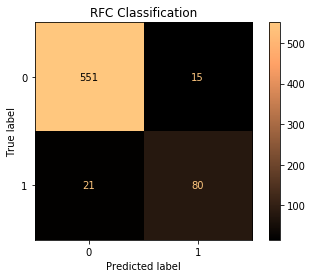

In [48]:
plot_confusion_matrix(RFC, X_test, y_test, cmap='copper')
plt.title('RFC Classification')

Our random forest model was 95% accurate in identifying our true postives (recall) of 82%

#### Final Best Model: Random Forest

In [49]:
#creating the best model
bestmodel = RandomForestClassifier(criterion='gini') 
bestmodel.fit(X_train, y_train)

RandomForestClassifier()

In [50]:
#looking at feature importance
bestmodel.feature_importances_

array([0.03385099, 0.02452531, 0.14429217, 0.03638387, 0.12415622,
       0.07414389, 0.03401325, 0.04817144, 0.04010619, 0.0365109 ,
       0.02476625, 0.0484375 , 0.0530417 , 0.01504665, 0.12044864,
       0.03463549, 0.03794183, 0.04349885, 0.01271092, 0.01331794])

In [51]:
#using pearson coeff for correlation
bm = pd.DataFrame({'Features':X.columns, 'coeff':bestmodel.feature_importances_})

In [52]:
#ranking coeff
final_model = bm.sort_values(by='coeff', ascending=False)

<BarContainer object of 10 artists>

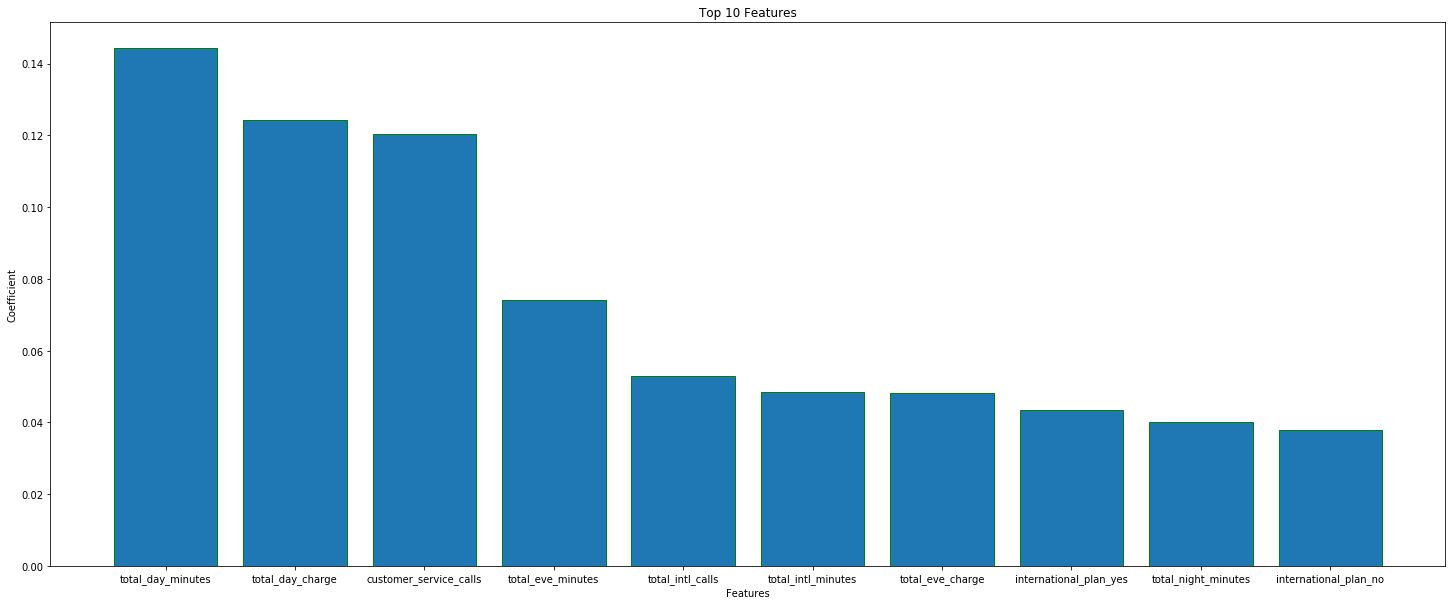

In [53]:
fm1 = final_model.head(10)
plt.figure(figsize=(25,10))
plt.title('Top 10 Features')
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.bar(fm1['Features'], fm1['coeff'], edgecolor='green')

In [54]:
finalmodeldf = df

In [55]:
finalmodeldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   account_length          3333 non-null   int64 
 1   international_plan      3333 non-null   object
 2   voice_mail_plan         3333 non-null   object
 3   number_vmail_messages   3333 non-null   int64 
 4   total_day_minutes       3333 non-null   int64 
 5   total_day_calls         3333 non-null   int64 
 6   total_day_charge        3333 non-null   int64 
 7   total_eve_minutes       3333 non-null   int64 
 8   total_eve_calls         3333 non-null   int64 
 9   total_eve_charge        3333 non-null   int64 
 10  total_night_minutes     3333 non-null   int64 
 11  total_night_calls       3333 non-null   int64 
 12  total_night_charge      3333 non-null   int64 
 13  total_intl_minutes      3333 non-null   int64 
 14  total_intl_calls        3333 non-null   int64 
 15  tota

In [56]:
#chaging target to num variable
labelencoder = LabelEncoder()
finalmodeldf['churn'] = labelencoder.fit_transform(finalmodeldf['churn'])

#create and set features
X = finalmodeldf.drop(columns= 'churn', axis=1)
y = df['churn']

#creating dummies for categorical variables
X = pd.get_dummies(X)
X.head()

#checking the columns
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   account_length          3333 non-null   int64
 1   number_vmail_messages   3333 non-null   int64
 2   total_day_minutes       3333 non-null   int64
 3   total_day_calls         3333 non-null   int64
 4   total_day_charge        3333 non-null   int64
 5   total_eve_minutes       3333 non-null   int64
 6   total_eve_calls         3333 non-null   int64
 7   total_eve_charge        3333 non-null   int64
 8   total_night_minutes     3333 non-null   int64
 9   total_night_calls       3333 non-null   int64
 10  total_night_charge      3333 non-null   int64
 11  total_intl_minutes      3333 non-null   int64
 12  total_intl_calls        3333 non-null   int64
 13  total_intl_charge       3333 non-null   int64
 14  customer_service_calls  3333 non-null   int64
 15  all_calls            

In [57]:
# test/train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
# assigning classifier
rfc = RandomForestClassifier(random_state=101)

#applying parameters
params = {
    'max_features': [1, 'sqrt', 'log2'],
    'max_depth': [None, 1, 2, 3, 4, 5],
    'criterion': ['entropy', 'gini']
}

#gridsearch for hyperparameter tuning
grid = GridSearchCV(estimator= rfc, param_grid=params, verbose=1)

In [59]:
#fitting train data
grid.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(estimator=RandomForestClassifier(random_state=101),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [None, 1, 2, 3, 4, 5],
                         'max_features': [1, 'sqrt', 'log2']},
             verbose=1)

In [60]:
#finding best paramaters
rf_best = grid.best_estimator_

In [61]:
#checking cross validation score
cross_val_score(rf_best, X, y, scoring='f1_micro')

array([0.94902549, 0.94602699, 0.96401799, 0.94894895, 0.95645646])

In [62]:
#classification report
print(classification_report(y_test, rf_best.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       566
           1       0.93      0.70      0.80       101

    accuracy                           0.95       667
   macro avg       0.94      0.85      0.89       667
weighted avg       0.95      0.95      0.94       667



Text(0.5, 1.0, 'Final RFC Classification')

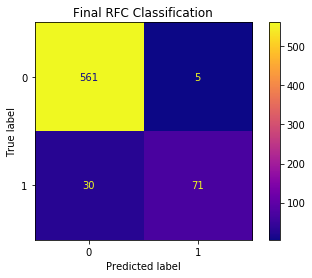

In [63]:
#creating confusion matrix 
plot_confusion_matrix(rf_best, X_test, y_test, cmap='plasma')
plt.title('Final RFC Classification')

After hyperparameter tuning, our accuracy stayed the same overall, however we got a higher precision and a lower recall from our original rf model.

### Findings/Conclusion

The Random Forest Classifier was 95% accurate in classifying churn of the customer. We also got a recall of 82% (our model correctly identified true positives 82% of the time). However, after implementing hyperparameter tuning, the accuracy stayed the same while the precision increased, and the recall decreased. The f1 scores were close with .82 from the original rf model and .80 from the final one. Our cross validation score was about 95%, which showed us our model performed well and avoided overfitting. We were also successfully able to see an increase in our accuracy from our baseline model to final model in 10%.

Total day minutes, total day charge, and customer service calls seem to be the main reasons why customers are churning. Recommendations we would give to SyriaTel is to work out better plans that are more fitting for customers who make more calls or use their phone more overall. This could be unlimited plans. Also, this could cut down on the number of customers making customer service calls that cause them to churn. We also recommend training customer service staff in dealing with unhappy customers better.